In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)

100%|██████████| 62.0k/62.0k [00:00<00:00, 427kB/s]

Extracting files...
Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = path + "/marketing_campaign.csv"
df = pd.read_csv(data_path, sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

C:\Users\engsm\AppData\Local\Temp\ipykernel_27152\4228175585.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Category", y="Amount", data=amounts_spent, ci=None)


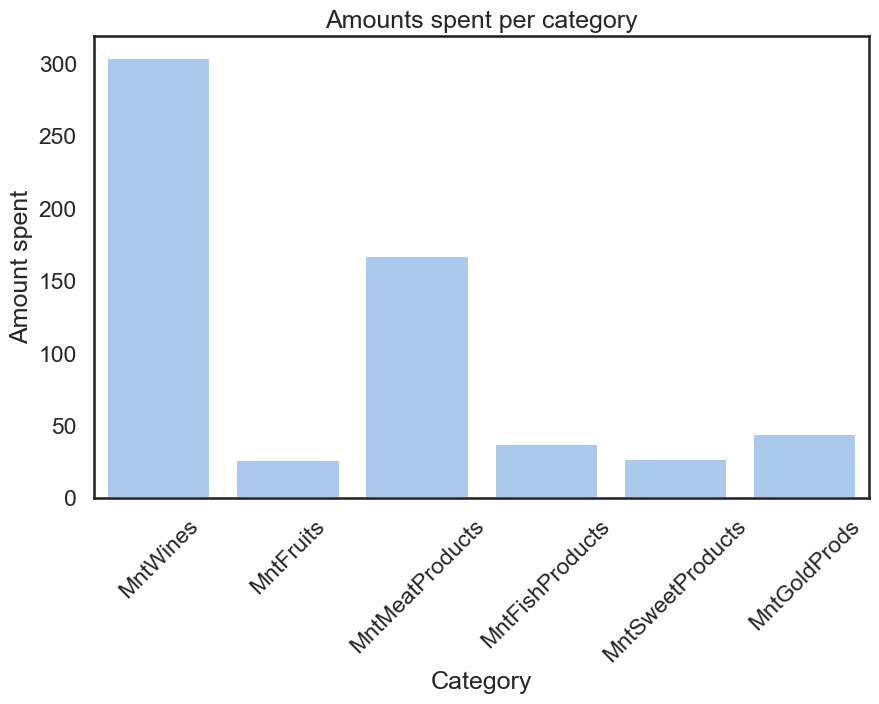

In [ ]:
# Apply descriptive statistics to the dataset
amounts_spent = df[["ID","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]]
amounts_spent.groupby("ID").sum()
# Plot pie chart of the amounts spent per category
amounts_spent = amounts_spent.drop(columns=["ID"])
amounts_spent = amounts_spent.melt()
amounts_spent = amounts_spent.rename(columns={"variable":"Category", "value":"Amount"})
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("talk")
sns.set_style("white")
sns.set_color_codes("pastel")
plt.title("Amounts spent per category")
sns.barplot(x="Category", y="Amount", data=amounts_spent, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Amount spent")
plt.show()

In [15]:

# list all columns that are object type
object_columns = df.select_dtypes(include=["object"]).columns.tolist()
print("Object columns:", object_columns)

for col in object_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Object columns: ['Education', 'Marital_Status', 'Dt_Customer']
Unique values in Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in Dt_Customer:
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-20

Encoding Categorical Variables

In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
print("Encoded Education column:")
print(label_encoder.classes_)
print(df['Education'].unique())


Encoded Education column:
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
[2 4 3 1 0]


In [19]:
df['Education'].head(10)

0    2
1    2
2    2
3    2
4    4
5    3
6    2
7    4
8    4
9    4
Name: Education, dtype: int64

Transforming to datetime format

In [25]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print("Converted Dt_Customer column to datetime:")
print(df['Dt_Customer'].head(10))
df['Dt_Customer'].info()

Converted Dt_Customer column to datetime:
0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
5   2013-09-09
6   2012-11-13
7   2013-05-08
8   2013-06-06
9   2014-03-13
Name: Dt_Customer, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


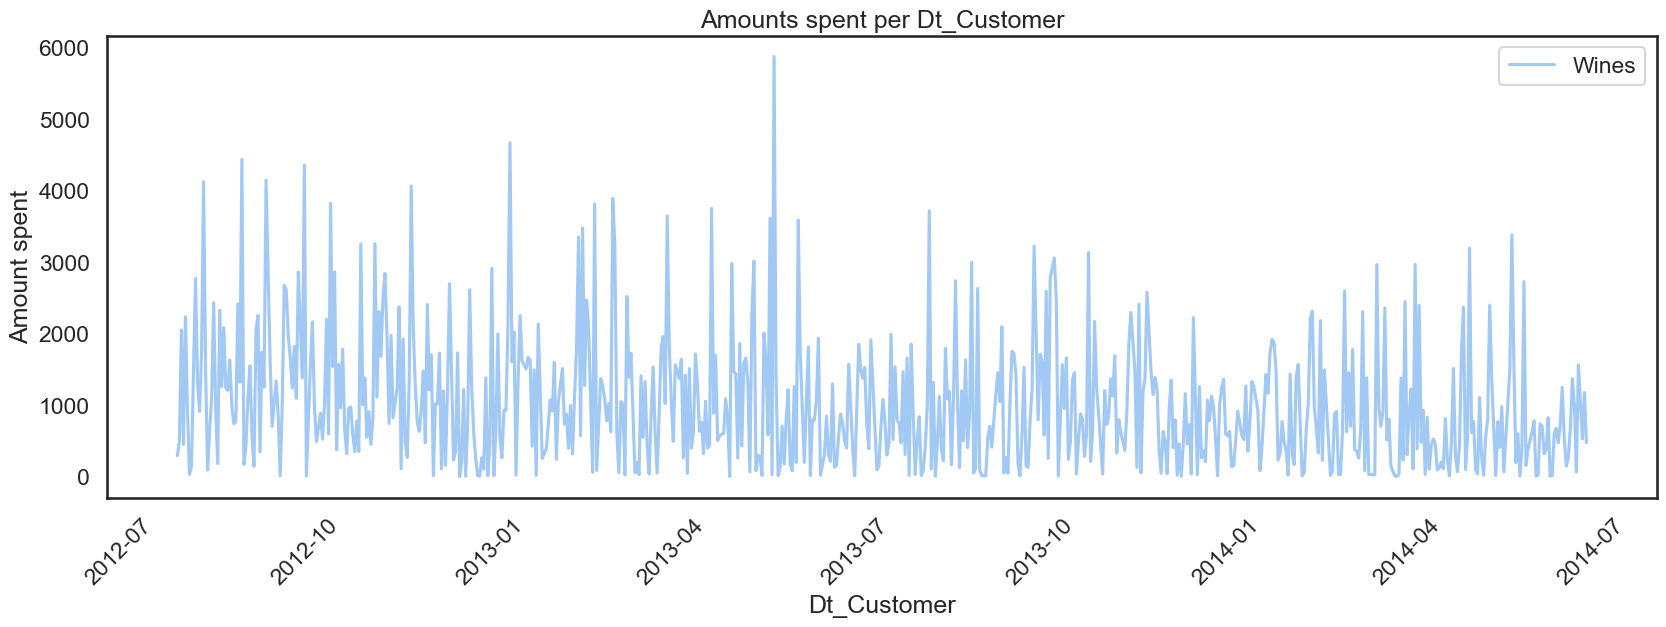

In [27]:
# Get the amount spent per Dt_Customer
amounts_spent = df[["Dt_Customer","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]]
amounts_spent = amounts_spent.groupby("Dt_Customer").sum()
amounts_spent = amounts_spent.reset_index()
# Plot the amounts spent per Dt_Customer
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("talk")
sns.set_style("white")
sns.set_color_codes("pastel")
plt.title("Amounts spent per Dt_Customer")
sns.lineplot(x="Dt_Customer", y="MntWines", data=amounts_spent, label="Wines")
# sns.lineplot(x="Dt_Customer", y="MntFruits", data=amounts_spent, label="Fruits")
# sns.lineplot(x="Dt_Customer", y="MntMeatProducts", data=amounts_spent, label="Meat Products")
# sns.lineplot(x="Dt_Customer", y="MntFishProducts", data=amounts_spent, label="Fish Products")
# sns.lineplot(x="Dt_Customer", y="MntSweetProducts", data=amounts_spent, label="Sweet Products")
# sns.lineplot(x="Dt_Customer", y="MntGoldProds", data=amounts_spent, label="Gold Products")
plt.xlabel("Dt_Customer")
plt.ylabel("Amount spent")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1


In [4]:
import pandas as pd

data_path = path + "/housing.csv"
df = pd.read_csv(data_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


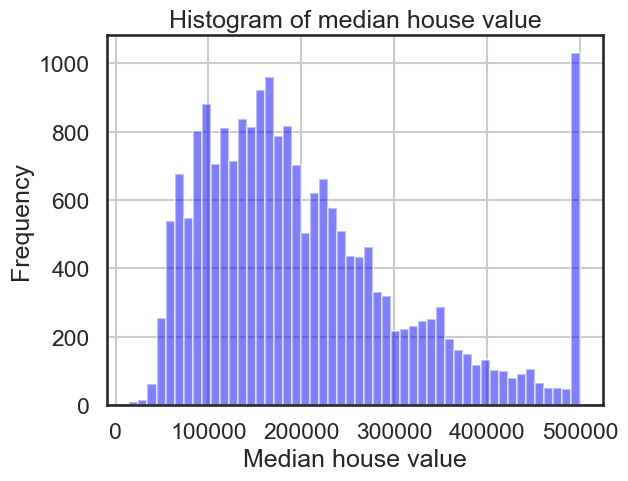

In [31]:
df['median_house_value'].hist(bins=50, color='blue', alpha=0.5)
plt.title("Histogram of median house value")
plt.xlabel("Median house value")
plt.ylabel("Frequency")
plt.show()

In [32]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [33]:
# List all columns that have missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in columns:")
print(missing_values)

Missing values in columns:
total_bedrooms    207
dtype: int64


# Dealing with missing values

In [34]:
# Drop missing values
df_droppped_missing = df.dropna()
df_droppped_missing.info()
# Check if there are any missing values left
missing_values = df_droppped_missing.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in columns after dropping:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
Missing values in columns after dropping:
Series([], dtype: int64)


In [43]:
# Replace missing values with the mean / median / zero of the column
df_replaced_missing= df.fillna({'total_bedrooms':df['total_bedrooms'].mean()})
# Check if there are any missing values left
missing_values = df_replaced_missing.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in columns after replacing:")
print(missing_values)

print(df_replaced_missing.info())


Missing values in columns after replacing:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [45]:
# Imputation of missing values using KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# Create a KNN imputer object with 5 neighbors
imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df.columns)
# Check if there are any missing values left
missing_values = df_imputed.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in columns after KNN imputation:")
print(missing_values)

# Check the info of the imputed dataframe
df_imputed.info()

Missing values in columns after KNN imputation:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [46]:
# Test the imputed vs dropped dataframe against a simple model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(df_imputed.drop(columns=["median_house_value"]), df_imputed["median_house_value"], test_size=0.2, random_state=42)

# Create a pipeline with a linear regression model
pipeline = Pipeline([
    ('model', LinearRegression())
])
# Fit the model
pipeline.fit(x_train, y_train)
# Make predictions
y_pred = pipeline.predict(x_test)
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 4954918103.928984
R2 score: 0.6218800247705496


In [53]:

x_train, x_test, y_train, y_test = train_test_split(df_droppped_missing.drop(columns=["median_house_value"]), df_droppped_missing["median_house_value"], test_size=0.2, random_state=42)

# Create a pipeline with a linear regression model and Add label encoding to the pipeline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['ocean_proximity'] = le.fit_transform(x_train['ocean_proximity'])
x_test['ocean_proximity'] = le.transform(x_test['ocean_proximity'])

pipeline = Pipeline([
    ('model', LinearRegression()),

])
# Fit the model
pipeline.fit(x_train, y_train)
# Make predictions
y_pred = pipeline.predict(x_test)
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 4924108937.91196
R2 score: 0.6399236679243396


In [54]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


# Apply some scaling

In [62]:
# Using robust scaler to scale the data
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

le = LabelEncoder()
df_droppped_missing['ocean_proximity'] = le.fit_transform(df_droppped_missing['ocean_proximity'])

scaler = RobustScaler()
X = scaler.fit_transform(df_droppped_missing.drop(columns=["median_house_value"]))
# X = df_droppped_missing.drop(columns=["median_house_value"])
x_train, x_test, y_train, y_test = train_test_split(X, df_droppped_missing["median_house_value"], test_size=0.2, random_state=42)

# Create a pipeline with a linear regression model and Add label encoding to the pipeline

pipeline = Pipeline([
    ('model', RandomForestRegressor()),

])
# Fit the model
pipeline.fit(x_train, y_train)
# Make predictions
y_pred = pipeline.predict(x_test)
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)

C:\Users\engsm\AppData\Local\Temp\ipykernel_27152\1185463401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_droppped_missing['ocean_proximity'] = le.fit_transform(df_droppped_missing['ocean_proximity'])


Mean squared error: 2456467666.3343806
R2 score: 0.8203703698864114


# Check and deal with outliers

In [85]:
# Check outliers using z-score
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df_droppped_missing.drop(columns=["median_house_value"])))
# print("Z-scores:")
# print(z_scores)
threshold = 2
outliers_population = z_scores['population']
outliers_population = np.where(z_scores['population'] > threshold)
print("Outliers in population:")
print(len(outliers_population[0]))


Outliers in population:
748


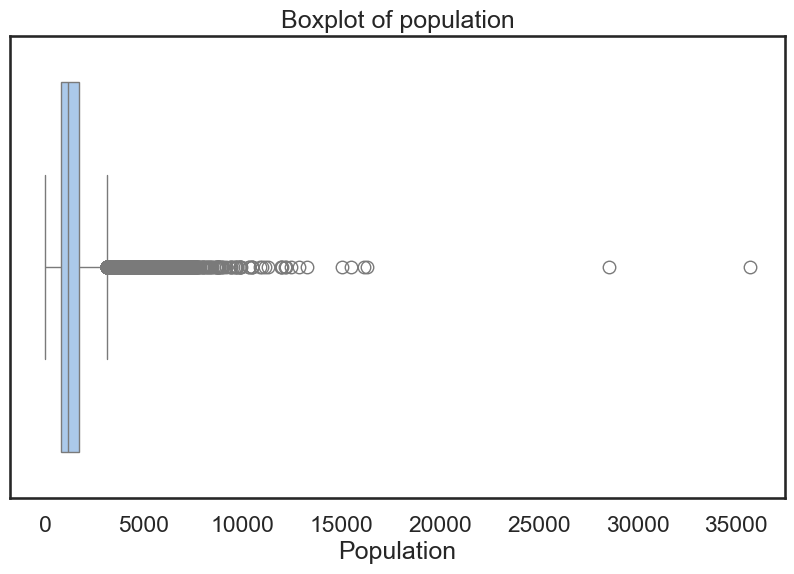

303


In [81]:
# Check outliers using boxplot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("talk")
sns.set_style("white")
sns.set_color_codes("pastel")
plt.title("Boxplot of population")
sns.boxplot(x=df_droppped_missing['population'])
plt.xlabel("Population")
plt.show()

print(len(df_droppped_missing['population'][df_droppped_missing['population'] > 5000]))

In [86]:
# Check outliers using IQR
Q1 = df_droppped_missing['population'].quantile(0.25)
Q3 = df_droppped_missing['population'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
outliers_population = df_droppped_missing[(df_droppped_missing['population'] < lower_bound) | (df_droppped_missing['population'] > upper_bound)]
print("Outliers in population:")
print(len(outliers_population))

IQR: 935.0
Lower bound: -615.5
Upper bound: 3124.5
Outliers in population:
1190


In [83]:
print(lower_bound, upper_bound)

-615.5 3124.5


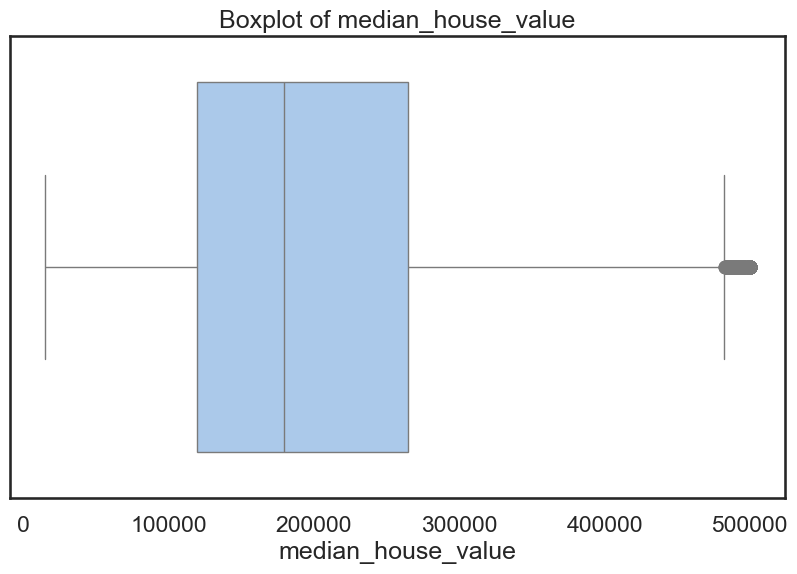

In [89]:
# Check outliers using boxplot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("talk")
sns.set_style("white")
sns.set_color_codes("pastel")
plt.title("Boxplot of median_house_value")
sns.boxplot(x=df_droppped_missing['median_house_value'])
plt.xlabel("median_house_value")
plt.show()

# print(len(df_droppped_missing['population'][df_droppped_missing['population'] > 5000]))

In [93]:
# Drop outliers using IQR
df_no_outliers = df_droppped_missing[(df_droppped_missing['population'] >= lower_bound) & (df_droppped_missing['population'] <= upper_bound)]

x_train, x_test, y_train, y_test = train_test_split(df_no_outliers.drop(columns=["median_house_value"]), df_no_outliers["median_house_value"], test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
# Make predictions
y_pred = pipeline.predict(x_test)
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)


Mean squared error: 2540216166.977978
R2 score: 0.8072014927335945


In [94]:
x_train.shape

(15394, 9)

In [96]:
# Drop outliers using z-score
df_no_outliers = df_droppped_missing[(z_scores < threshold).all(axis=1)]

x_train, x_test, y_train, y_test = train_test_split(df_no_outliers.drop(columns=["median_house_value"]), df_no_outliers["median_house_value"], test_size=0.2, random_state=42)
pipeline.fit(x_train, y_train)
# Make predictions
y_pred = pipeline.predict(x_test)
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)


Mean squared error: 2432063733.9397883
R2 score: 0.7819791795641593


In [97]:
x_train.shape

(14298, 9)

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# Check for duplicates acros the whole row
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check for duplicates in a specific column
print(df.duplicated(subset=['median_house_value']).sum())

# get samples from the duplicates
df[df.duplicated(subset=['median_house_value'], keep=False)].sort_values(by='median_house_value', ascending=False).head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
4604,-118.33,34.06,52.0,1841.0,240.0,693.0,218.0,15.0001,500001.0,<1H OCEAN
4603,-118.32,34.07,52.0,2156.0,306.0,861.0,311.0,8.8062,500001.0,<1H OCEAN
4644,-118.31,34.06,24.0,1336.0,453.0,1268.0,426.0,2.8202,500001.0,<1H OCEAN
4688,-118.35,34.07,45.0,3312.0,880.0,1157.0,809.0,3.5719,500001.0,<1H OCEAN
4605,-118.33,34.07,52.0,2248.0,255.0,813.0,265.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN
4607,-118.34,34.06,52.0,2089.0,309.0,883.0,281.0,7.4574,500001.0,<1H OCEAN


## feature engineering

In [21]:
# Get location from longitude and latitude
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myapplication")
location = geolocator.reverse("34.06, -118.69", addressdetails=False)
# location to str
str(location)

'South Malibu Canyon Road, Unincorporated Santa Monica Mountains, Los Angeles County, 90263, United States'

In [25]:
df.shape

(20640, 10)

In [24]:
coordinate_list = df[['latitude', 'longitude']].iloc[:10].values.tolist()
coordinate_list = [str(coord[0]) + ", " + str(coord[1]) for coord in coordinate_list]
print(coordinate_list)
locations = [geolocator.reverse(coordinates, addressdetails=False) for coordinates in coordinate_list]
locations = [str(location).split(",")[0] for location in locations]
print(locations)
df['location'] = locations

['37.88, -122.23', '37.86, -122.22', '37.85, -122.24', '37.85, -122.25', '37.85, -122.25', '37.85, -122.25', '37.84, -122.25', '37.84, -122.25', '37.84, -122.26', '37.84, -122.25']
['Convict Trail', '2093', 'Golden Gate Avenue', '6365', '6365', '6365', '5401', '5401', 'Colombo Club', '5401']


ValueError: Length of values (10) does not match length of index (20640)

In [26]:
df['coordinates'] = df[['latitude', 'longitude']].apply(lambda x: str(x[0]) + ", " + str(x[1]), axis=1)
print(df['coordinates'].head(10))

C:\Users\engsm\AppData\Local\Temp\ipykernel_7772\3501685739.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['coordinates'] = df[['latitude', 'longitude']].apply(lambda x: str(x[0]) + ", " + str(x[1]), axis=1)


0    37.88, -122.23
1    37.86, -122.22
2    37.85, -122.24
3    37.85, -122.25
4    37.85, -122.25
5    37.85, -122.25
6    37.84, -122.25
7    37.84, -122.25
8    37.84, -122.26
9    37.84, -122.25
Name: coordinates, dtype: object


In [27]:
df['coordinates'].nunique()

12590